In [37]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv('resultado1.csv')
data['fecha'] = pd.to_datetime(data['fecha'])

X = data[['fecha', 'ao']]
y = data['abierto/cerrado']

X['dia'] = X['fecha'].dt.day
X['mes'] = X['fecha'].dt.month
X['año'] = X['fecha'].dt.year

X = X.drop('fecha', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.dropna()
y_train = y_train[X_train.index] 
X_test = X_test.dropna()
y_test = y_test[X_test.index]



C:\Users\rmarc\AppData\Local\Temp\ipykernel_3292\1170479938.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dia'] = X['fecha'].dt.day


Características más importantes en el modelo:
  feature  importance
0      ao    0.548826
2     mes    0.320624
1     dia    0.085884
3     año    0.044667


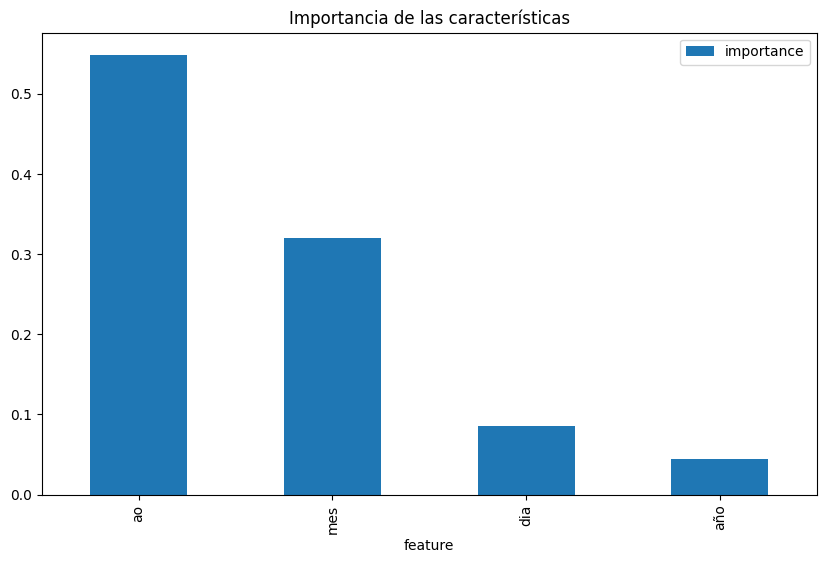

Precisión Árbol de Decisión: 98.28%


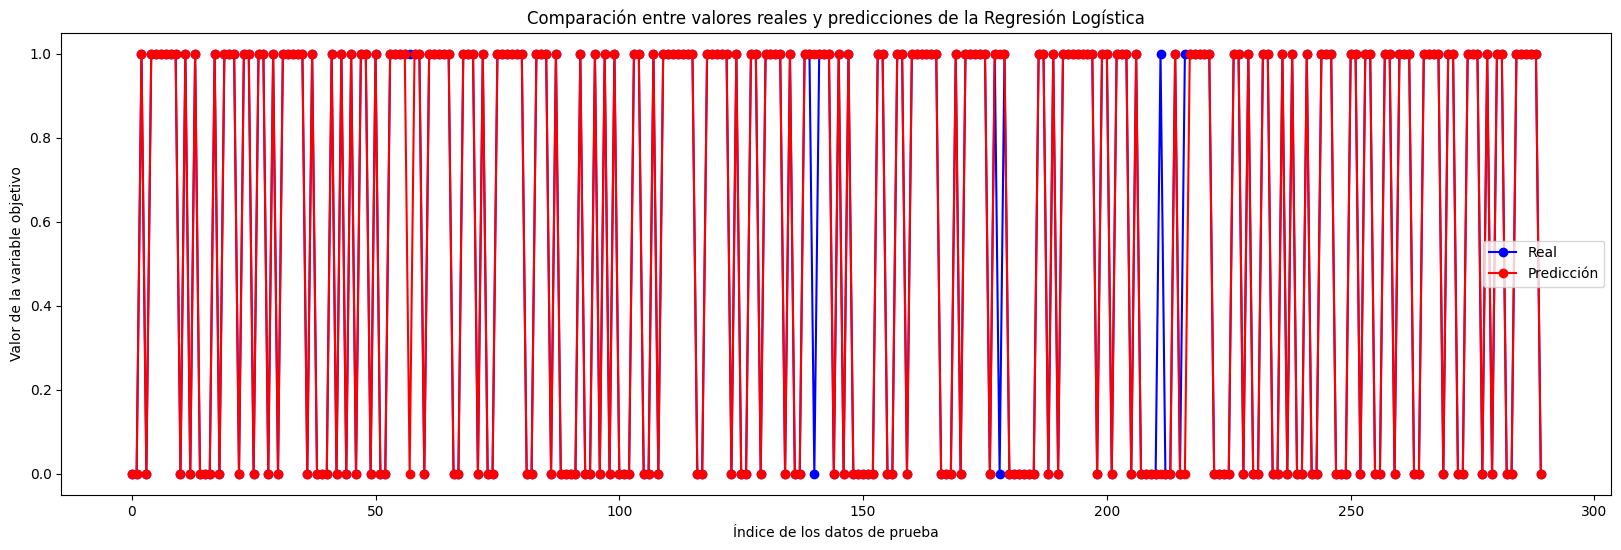

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

decision_tree = RandomForestClassifier(random_state=14)

decision_tree.fit(X_train, y_train)

feature_importances = decision_tree.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

importance_df = importance_df.sort_values(by='importance', ascending=False)

print("Características más importantes en el modelo:")
print(importance_df)

importance_df.plot.bar(x='feature', y='importance', figsize=(10, 6))
plt.title('Importancia de las características')
plt.show()

y_pred = decision_tree.predict(X_test)

precision_decision_tree = accuracy_score(y_test, y_pred)
print(f"Precisión Árbol de Decisión: {precision_decision_tree * 100:.2f}%")

plt.figure(figsize=(20, 6))

plt.plot(y_test.values, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

plt.title('Comparación entre valores reales y predicciones de la Regresión Logística')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

plt.show()



In [39]:
data2 = pd.read_csv('resultado2018.csv')

# Asegúrate de que la columna 'fecha' sea de tipo datetime
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Variable de fecha para filtrar, por ejemplo, 10 de enero de 2018
fecha_variable = pd.to_datetime('2018-04-10')

# Extrae el año y el mes de la fecha_variable
año = fecha_variable.year
mes = fecha_variable.month

# Filtra el DataFrame para incluir solo las filas del mismo año y mes
data2 = data2[(data2['fecha'].dt.year == año) & (data2['fecha'].dt.month == mes)]

data2

,fecha,UI,abierto/cerrado,ao
90,2018-04-01,-3584.655000,1.0,335.1
91,2018-04-02,-5691.425000,1.0,335.1
92,2018-04-03,-3279.275000,1.0,335.1
93,2018-04-04,-2171.097500,1.0,89.4
94,2018-04-05,-5900.617500,1.0,89.4
95,2018-04-06,-2685.407500,1.0,146.4
96,2018-04-07,-751.377500,1.0,146.4
97,2018-04-08,1643.097500,1.0,146.4
98,2018-04-09,-41.912500,1.0,146.4
99,2018-04-10,576.725000,1.0,146.4


In [40]:
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop(columns={'fecha', 'UI'}, axis=1)

data2 = data2.drop('abierto/cerrado', axis=1)

data3 = pd.read_csv('resultado2018.csv')

# Asegúrate de que la columna 'fecha' sea de tipo datetime
data3['fecha'] = pd.to_datetime(data3['fecha'])

# Extrae el año y el mes de la fecha_variable
año = fecha_variable.year
mes = fecha_variable.month

# Filtra el DataFrame para incluir solo las filas del mismo año y mes
data3 = data3[(data3['fecha'].dt.year == año) & (data3['fecha'].dt.month == mes)]

y_test_custom = data3['abierto/cerrado']

# Evaluar el modelo optimizado en los datos de prueba
y_test_pred = decision_tree.predict(data2)
test_accuracy = accuracy_score(y_test_custom, y_test_pred)

print(f"Precisión en los datos de prueba: {test_accuracy * 100:.2f}%")

Precisión en los datos de prueba: 93.33%
